In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## Voxel-based results

In [2]:
df = pd.read_csv('Results/results_ResNet50_Voxel.csv')

In [3]:
df

,type,scan_id,actual,pred
0,train,OAS30015_MR_d0116,0,0.498439
1,train,OAS30092_MR_d0636,0,0.498439
2,train,OAS30103_MR_d3306,0,0.498439
3,train,OAS30188_MR_d0246,0,0.498439
4,train,OAS30231_MR_d1469,0,0.498439
...,...,...,...,...
95,test,OAS30903_MR_d0046,1,0.498439
96,test,OAS30929_MR_d0115,1,0.498439
97,test,OAS31000_MR_d0072,1,0.498439
98,test,OAS31150_MR_d0073,1,0.498439


In [4]:
df_test = df[df['type']=='test']
y_true_test =  df_test.actual
y_pred_test = df_test.pred

In [5]:
roc_auc_score(y_true_test, y_pred_test)

0.5

In [6]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_true_test, y_pred_test)

In [7]:
false_positive_rate

array([0., 1.])

In [8]:
true_positive_rate

array([0., 1.])

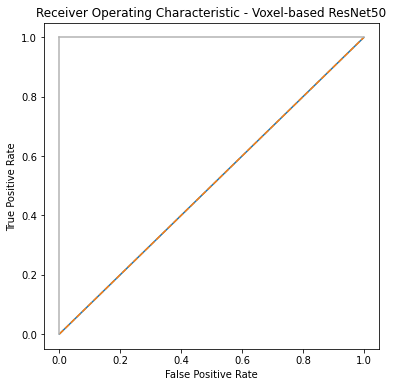

In [9]:
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Voxel-based ResNet50')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Patch-based methods

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
    
def model_eval(model_name, model_dir):
    df = pd.read_csv(model_dir)
    df = df.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
    df = df.reset_index()

    df_train = df[df['type']=='train']
    df_train = df_train.append(df[df['type']=='val'])
    x_train = df_train[df_train.columns[3:]]
    y_train = df_train['actual']

    df_test = df[df['type']=='test']
    x_test = df_test[df_test.columns[3:]]
    y_test = df_test['actual']

    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    train_preds = model.predict_proba(x_train)[:,1]
    train_acc = model.score(x_train, y_train)
    train_auroc = roc_auc_score(y_train, train_preds)

    test_preds = model.predict_proba(x_test)[:,1]
    test_acc = model.score(x_test, y_test)
    test_auroc = roc_auc_score(y_test, test_preds)

    false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, test_preds)

    plt.subplots(1, figsize=(6,6))
    plt.title('Receiver Operating Characteristic - '+model_name)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


    cm = confusion_matrix(y_test, model.predict(x_test))
    tn, fp, fn, tp = cm.ravel()
    # sensitivity (true positive rate (recall))
    test_sens = tp/(tp+fn)
    # specifity (true negative rate)
    test_spec = tn/(tn+fp)   
    
    plot_confusion_matrix(model, x_test, y_test)  
    plt.show()
    
#     print(model_name + ": Train accuracy = " + str(train_acc))
#     print(model_name + ": Train AUC = " + str(train_auroc))
    print(model_name + ": Test accuracy = " + str(test_acc))
    print(model_name + ": Test AUC = " + str(test_auroc))
    print(model_name + ": Test Sensitivity = " + str(test_sens))
    print(model_name + ": Test Specificity = " + str(test_spec))

### DenseNet50

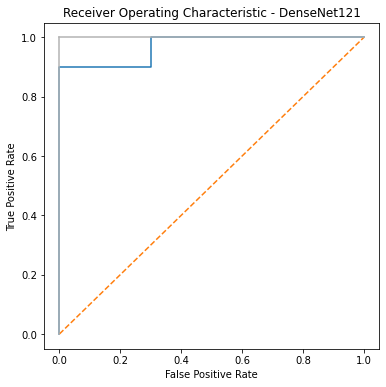

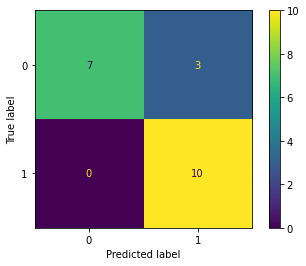

DenseNet121: Test accuracy = 0.85
DenseNet121: Test AUC = 0.97
DenseNet121: Test Sensitivity = 1.0
DenseNet121: Test Specificity = 0.7


In [16]:
model_eval(model_name='DenseNet121', model_dir='Results/results_DenseNet121.csv')

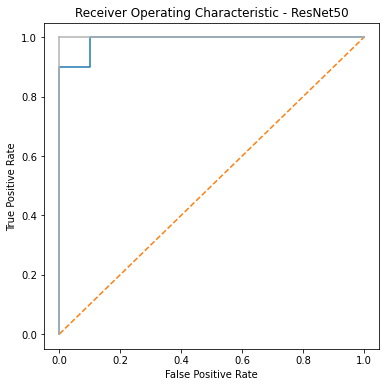

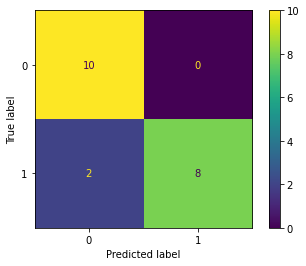

ResNet50: Test accuracy = 0.9
ResNet50: Test AUC = 0.99
ResNet50: Test Sensitivity = 0.8
ResNet50: Test Specificity = 1.0


In [12]:
model_eval(model_name='ResNet50', model_dir='Results/results_ResNet50.csv')

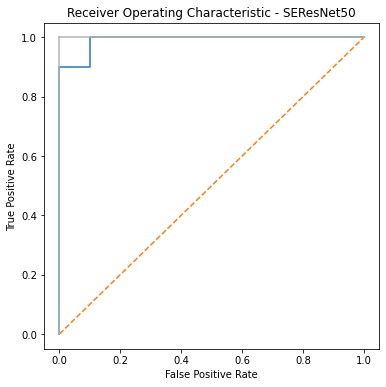

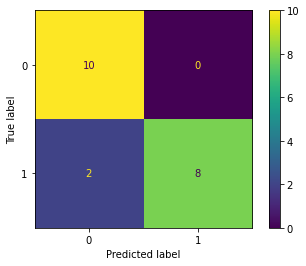

SEResNet50: Test accuracy = 0.9
SEResNet50: Test AUC = 0.99
SEResNet50: Test Sensitivity = 0.8
SEResNet50: Test Specificity = 1.0


In [13]:
model_eval(model_name='SEResNet50', model_dir='Results/results_ResNet50.csv')

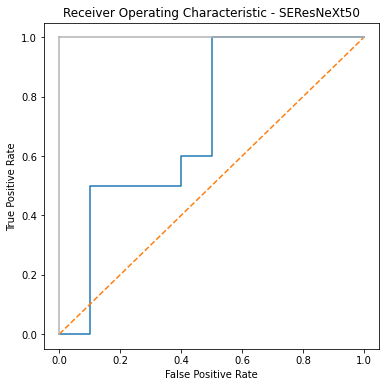

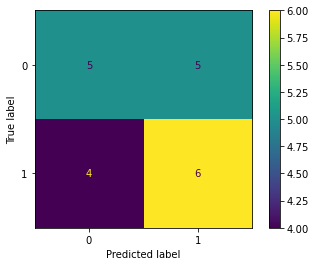

SEResNeXt50: Test accuracy = 0.55
SEResNeXt50: Test AUC = 0.71
SEResNeXt50: Test Sensitivity = 0.6
SEResNeXt50: Test Specificity = 0.5


In [14]:
model_eval(model_name='SEResNeXt50', model_dir='Results/results_SEResNeXt50.csv')